In [53]:
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

logdir = "../../logs"

In [2]:
data_path = "../../data/birth_life_2010.txt"

## Linear Regression
Model the linear relationship between:
* dependent variable Y
* explanatory variables X

* X: birth rate
* Y: life expectancy

190 countries

Find a linear relationship between X and Y to predict Y from X

### Loading Data

In [7]:
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples


# Step 1: read in data from the .txt file
data, n_samples = read_birth_life_data(data_path)

### Graph definition

In [57]:
tf.reset_default_graph()

In [58]:
# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
# Remember both X and Y are scalars with type float
X, Y = tf.placeholder(tf.float32, name="X"), tf.placeholder(tf.float32, name="Y")

In [59]:
# Step 3: create weight and bias, initialized to 0.0
# Make sure to use tf.get_variable
w, b = tf.Variable(0.0, name="weights"), tf.Variable(0.0, name="biases")

In [60]:
# Step 4: build model to predict Y
# e.g. how would you derive at Y_predicted given X, w, and b
Y_predicted = tf.add(tf.multiply(w, X), b, name="Y_predicted")

### Mean square error loss

In [50]:
# Step 5: use the square error as the loss function
loss = tf.square(tf.subtract(Y, Y_predicted, name='loss'))

### Huber loss

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/21983befe82b2509d1bb8dfa1064a35b6031d508)

In [61]:
def huber_loss(labels, predictions, delta=14.0):
    residual = tf.abs(labels - predictions)
    def f1(): return 0.5 * tf.square(residual)
    def f2(): return delta * residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

loss = huber_loss(Y, Y_predicted)

In [62]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.96it/s]


Took: 7.761460 seconds


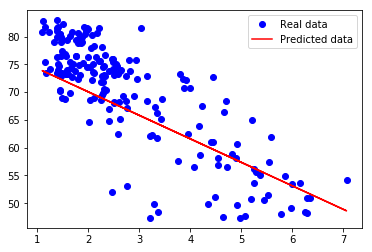

In [63]:
start = time.time()

with tf.Session() as sess:
    
    # Create a filewriter to write the model's graph to TensorBoard
    writer = tf.summary.FileWriter(logdir + '/linear_regression', sess.graph)
    
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())

    # Step 8: train the model for 100 epochs
    for i in tqdm(range(100)):
        total_loss = 0
        for x, y in data:
            # Execute train_op and get the value of loss.
            # Don't forget to feed in data for placeholders
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l

#         print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    writer.close()
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b])
    
print('Took: %f seconds' %(time.time() - start))

plt.figure()
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()